In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Prova pratica: 

Robertson problem using Backward euler with fix point method:

In [2]:
def robertson(u, t, k1, k2, k3):
    dy1 = -k1 * u[0] + k2 * u[1] * u[2]
    dy2 = k1 * u[0] - k2 * u[1] * u[2] - k3 * u[1]**2
    dy3 = k3 * u[1]**2
    return np.array([dy1, dy2, dy3])

def Fix_point(u ,t , h, k1, k2, k3):
    return u + h*robertson(u, t, k1, k2, k3) 
        
def BE_fix_point(u0, N, k1, k2, k3, h=0.1, tolerance=1e-8, max_iterations=100):
    u = [np.array(u0)]
    for i in range(1, N):
        t = i * h
        u_0 = u[i-1]
        u_h = u[i-1]
        for _ in range(max_iterations):
            u_1 = Fix_point(u_h ,t , h, k1, k2, k3)
            if np.linalg.norm(u_1 - u_0) < tolerance:
                break
            u_h = u_1
        u.append(u_1)
    return np.array(u)

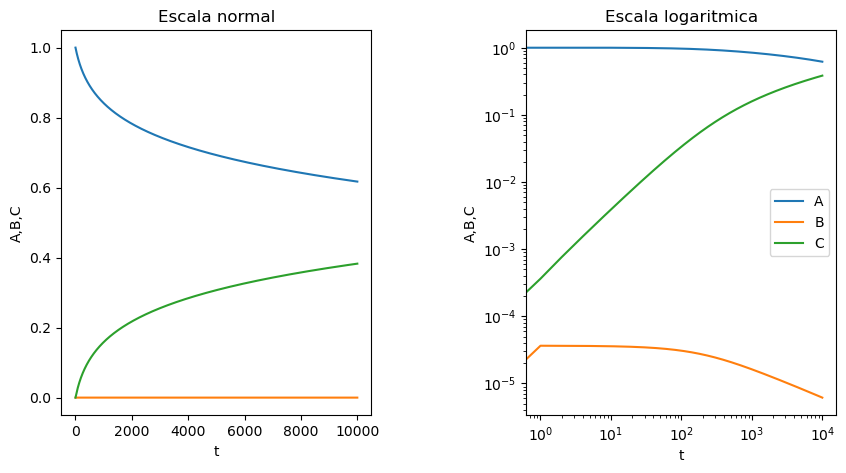

In [3]:
N = 10000
h = 0.0001
BE_fix_point = BE_fix_point([1,0,0], N, 0.04, 1e4, 3e7, h)
A = [item[0] for item in BE_fix_point]
B = [item[1] for item in BE_fix_point]
C = [item[2] for item in BE_fix_point]
t = [t for t in range(N)]
fig,(x1,x2)=plt.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
x1.plot(t, A, label = 'A')
x1.plot(t, B, label = 'B')
x1.plot(t,C , label = 'C')
x1.set_xlabel('t')
x1.set_ylabel('A,B,C')
x1.set_title("Escala normal")
x2.loglog(t, A, label = 'A')
x2.loglog(t, B, label = 'B')
x2.loglog(t,C , label = 'C')
x2.set_xlabel('t')
x2.set_title("Escala logaritmica")
x2.set_ylabel('A,B,C')
plt.legend()
plt.show()

Robertson problem using Backward euler with Newton Method:

In [7]:
def robertson(u, t, h, k1, k2, k3):
        dy1 = -k1 * u[0] + k2 * u[1] * u[2]
        dy2 = k1 * u[0] - k2 * u[1] * u[2] - k3 * u[1]**2
        dy3 = k3 * u[1]**2
        return np.array([dy1, dy2, dy3])

def jacobiano(u, t, h, k1, k2, k3):
    dy1_du0 = -k1
    dy1_du1 = k2 * u[2]
    dy1_du2 = k2 * u[1]
    dy2_du0 = k1
    dy2_du1 = -k2 * u[2] - 2 * k3 * u[1]
    dy2_du2 = -k2 * u[1]
    dy3_du0 = 0
    dy3_du1 = 2 * k3 * u[1]
    dy3_du2 = 0
    return np.array([[dy1_du0, dy1_du1, dy1_du2],
                     [dy2_du0, dy2_du1, dy2_du2],
                     [dy3_du0, dy3_du1, dy3_du2]])


def newton(u, t, k1, k2, k3, h=0.1):
    u_0 = u
    R = robertson(u_0, t, h, k1, k2, k3)
    R_1 = np.array(u_0 + h*R - u_0)
    J = jacobiano(u_0, t, h, k1, k2, k3)
    J_1 = np.array(h*J - np.identity(len(u_0)))
    d_u = np.linalg.solve(J_1, -R_1)
    return d_u

def BE_newton(u0, N, k1, k2, k3, h=0.1, tolerance=1e-8, max_iterations=100):
    u = [np.array(u0)]
    for i in range(1, N):
        t = i * h
        u_0 = u[i-1]
        iterations = 0
        while iterations < max_iterations:
            d_u = newton(u_0, t, k1, k2, k3, h)
            u_1 = u_0 + d_u
            if np.all(np.abs(u_0 + h * robertson(u_1, t, h, k1, k2, k3) - u_1) < tolerance):
                break
            u_0 = u_1
            iterations += 1
        u.append(u_1)
    return np.array(u)

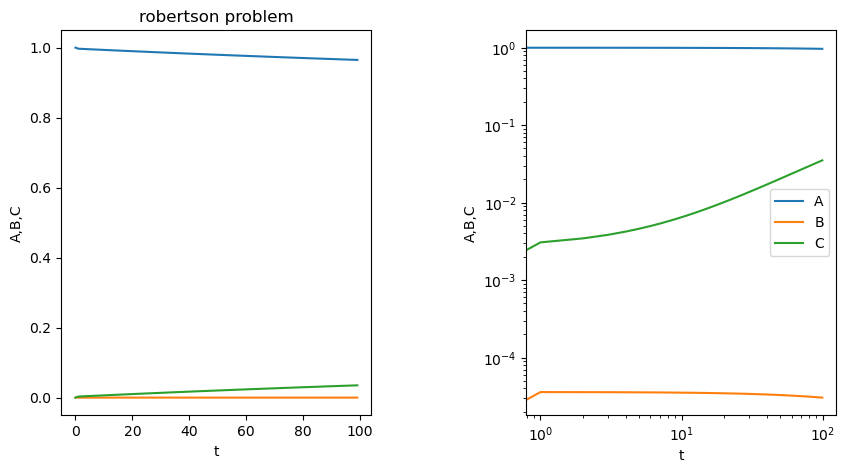

In [8]:
N = 100
h = 0.01
BE_newton = BE_newton([1,0,0], N, 0.04, 1e4, 3e7, h)
A = [item[0] for item in BE_newton]
B = [item[1] for item in BE_newton]
C = [item[2] for item in BE_newton]
t = [t for t in range(N)]
fig,(x1,x2)=plt.subplots(1,2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
x1.plot(t, A, label = 'A')
x1.plot(t, B, label = 'B')
x1.plot(t,C , label = 'C')
x1.set_xlabel('t')
x1.set_ylabel('A,B,C')
x1.set_title("robertson problem")
x2.loglog(t, A, label = 'A')
x2.loglog(t, B, label = 'B')
x2.loglog(t,C , label = 'C')
x2.set_xlabel('t')
x2.set_ylabel('A,B,C')
plt.legend()
plt.show()